In [ ]:
pip install pandas

In [ ]:
pip install numpy

In [ ]:
pip install matplotlib


In [ ]:
pip install seaborn

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [9]:
sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (12, 6)

In [10]:
customers = pd.read_csv('/Users/shreyas/Desktop/untitled folder/ecommerce_analysis/data/Customers.csv')
products = pd.read_csv('/Users/shreyas/Desktop/untitled folder/ecommerce_analysis/data/Products.csv')
transactions = pd.read_csv('/Users/shreyas/Desktop/untitled folder/ecommerce_analysis/data/Transactions.csv')

In [11]:
print("Customers Dataset:")
print(customers.head(), "\n")
print("Products Dataset:")
print(products.head(), "\n")
print("Transactions Dataset:")
print(transactions.head(), "\n")

Customers Dataset:
  CustomerID        CustomerName         Region  SignupDate
0      C0001    Lawrence Carroll  South America  2022-07-10
1      C0002      Elizabeth Lutz           Asia  2022-02-13
2      C0003      Michael Rivera  South America  2024-03-07
3      C0004  Kathleen Rodriguez  South America  2022-10-09
4      C0005         Laura Weber           Asia  2022-08-15 

Products Dataset:
  ProductID              ProductName     Category   Price
0      P001     ActiveWear Biography        Books  169.30
1      P002    ActiveWear Smartwatch  Electronics  346.30
2      P003  ComfortLiving Biography        Books   44.12
3      P004            BookWorld Rug   Home Decor   95.69
4      P005          TechPro T-Shirt     Clothing  429.31 

Transactions Dataset:
  TransactionID CustomerID ProductID      TransactionDate  Quantity  \
0        T00001      C0199      P067  2024-08-25 12:38:23         1   
1        T00112      C0146      P067  2024-05-27 22:23:54         1   
2        T00166 

In [12]:
print("Data Types:")
print(customers.info(), "\n")
print(products.info(), "\n")
print(transactions.info(), "\n")

Data Types:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   CustomerID    200 non-null    object
 1   CustomerName  200 non-null    object
 2   Region        200 non-null    object
 3   SignupDate    200 non-null    object
dtypes: object(4)
memory usage: 6.4+ KB
None 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   ProductID    100 non-null    object 
 1   ProductName  100 non-null    object 
 2   Category     100 non-null    object 
 3   Price        100 non-null    float64
dtypes: float64(1), object(3)
memory usage: 3.3+ KB
None 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------         

In [13]:
print("Summary Statistics for Transactions:")
print(transactions.describe())

Summary Statistics for Transactions:
          Quantity   TotalValue       Price
count  1000.000000  1000.000000  1000.00000
mean      2.537000   689.995560   272.55407
std       1.117981   493.144478   140.73639
min       1.000000    16.080000    16.08000
25%       2.000000   295.295000   147.95000
50%       3.000000   588.880000   299.93000
75%       4.000000  1011.660000   404.40000
max       4.000000  1991.040000   497.76000


In [14]:
print("\nMissing Values:")
print(customers.isnull().sum())
print(products.isnull().sum())
print(transactions.isnull().sum())


Missing Values:
CustomerID      0
CustomerName    0
Region          0
SignupDate      0
dtype: int64
ProductID      0
ProductName    0
Category       0
Price          0
dtype: int64
TransactionID      0
CustomerID         0
ProductID          0
TransactionDate    0
Quantity           0
TotalValue         0
Price              0
dtype: int64


In [15]:
customers.drop_duplicates(inplace=True)
products.drop_duplicates(inplace=True)
transactions.drop_duplicates(inplace=True)

In [16]:
customers['SignupDate'] = pd.to_datetime(customers['SignupDate'])
transactions['TransactionDate'] = pd.to_datetime(transactions['TransactionDate'])

In [17]:
print("\nUnique Customers in Transactions:", transactions['CustomerID'].nunique())
print("Unique Customers in Customers Dataset:", customers['CustomerID'].nunique())

print("Unique Products in Transactions:", transactions['ProductID'].nunique())
print("Unique Products in Products Dataset:", products['ProductID'].nunique())


Unique Customers in Transactions: 199
Unique Customers in Customers Dataset: 200
Unique Products in Transactions: 100
Unique Products in Products Dataset: 100


In [18]:
customer_region_count = customers['Region'].value_counts()
print("\nCustomer Count by Region:")
print(customer_region_count)


Customer Count by Region:
Region
South America    59
Europe           50
North America    46
Asia             45
Name: count, dtype: int64


In [19]:
customers['SignupYearMonth'] = customers['SignupDate'].dt.to_period('M')
signup_trends = customers['SignupYearMonth'].value_counts().sort_index()

In [20]:
product_category_count = products['Category'].value_counts()
print("\nProduct Category Distribution:")
print(product_category_count)


Product Category Distribution:
Category
Books          26
Electronics    26
Clothing       25
Home Decor     23
Name: count, dtype: int64


In [21]:
print("\nProduct Price Distribution:")
print(products['Price'].describe())


Product Price Distribution:
count    100.000000
mean     267.551700
std      143.219383
min       16.080000
25%      147.767500
50%      292.875000
75%      397.090000
max      497.760000
Name: Price, dtype: float64


In [22]:
transactions['TransactionYearMonth'] = transactions['TransactionDate'].dt.to_period('M')
monthly_sales = transactions.groupby('TransactionYearMonth')['TotalValue'].sum()

In [23]:
top_customers = transactions.groupby('CustomerID')['TotalValue'].sum().sort_values(ascending=False).head(10)
top_products = transactions.groupby('ProductID')['TotalValue'].sum().sort_values(ascending=False).head(10)


In [24]:
print("\nTransaction Quantity Distribution:")
print(transactions['Quantity'].describe())


Transaction Quantity Distribution:
count    1000.000000
mean        2.537000
std         1.117981
min         1.000000
25%         2.000000
50%         3.000000
75%         4.000000
max         4.000000
Name: Quantity, dtype: float64


In [25]:
merged_data = transactions.merge(customers, on='CustomerID', how='inner').merge(products, on='ProductID', how='inner')
print("\nMerged Dataset Sample:")
print(merged_data.head())


Merged Dataset Sample:
  TransactionID CustomerID ProductID     TransactionDate  Quantity  \
0        T00001      C0199      P067 2024-08-25 12:38:23         1   
1        T00112      C0146      P067 2024-05-27 22:23:54         1   
2        T00166      C0127      P067 2024-04-25 07:38:55         1   
3        T00272      C0087      P067 2024-03-26 22:55:37         2   
4        T00363      C0070      P067 2024-03-21 15:10:10         3   

   TotalValue  Price_x TransactionYearMonth     CustomerName         Region  \
0      300.68   300.68              2024-08   Andrea Jenkins         Europe   
1      300.68   300.68              2024-05  Brittany Harvey           Asia   
2      300.68   300.68              2024-04  Kathryn Stevens         Europe   
3      601.36   300.68              2024-03  Travis Campbell  South America   
4      902.04   300.68              2024-03    Timothy Perez         Europe   

  SignupDate SignupYearMonth                      ProductName     Category  \
0 

/var/folders/8r/ny9l6hrx2bl3fdnrypzcw9m80000gn/T/ipykernel_50709/426257744.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=customer_region_count.index, y=customer_region_count.values, palette='viridis')


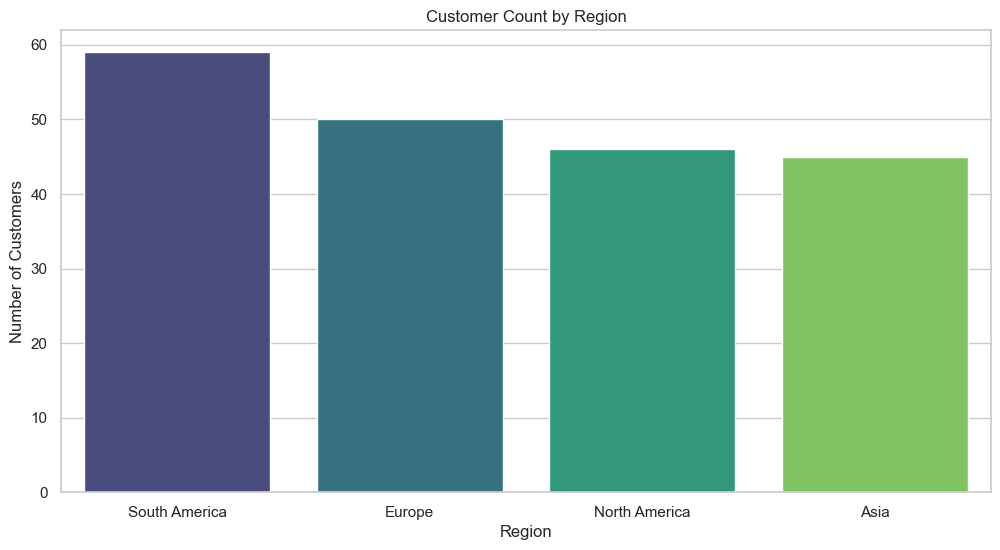

In [26]:
sns.barplot(x=customer_region_count.index, y=customer_region_count.values, palette='viridis')
plt.title("Customer Count by Region")
plt.xlabel("Region")
plt.ylabel("Number of Customers")
plt.show()

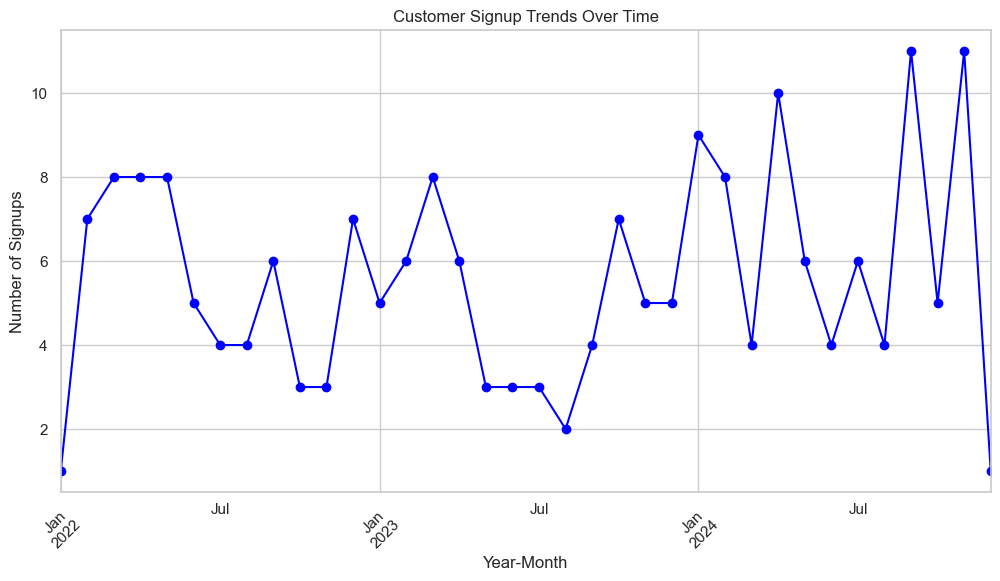

In [27]:
signup_trends.sort_index().plot(kind='line', marker='o', color='blue')
plt.title("Customer Signup Trends Over Time")
plt.xlabel("Year-Month")
plt.ylabel("Number of Signups")
plt.xticks(rotation=45)
plt.show()

/var/folders/8r/ny9l6hrx2bl3fdnrypzcw9m80000gn/T/ipykernel_50709/2721627760.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=product_category_count.index, y=product_category_count.values, palette='muted')


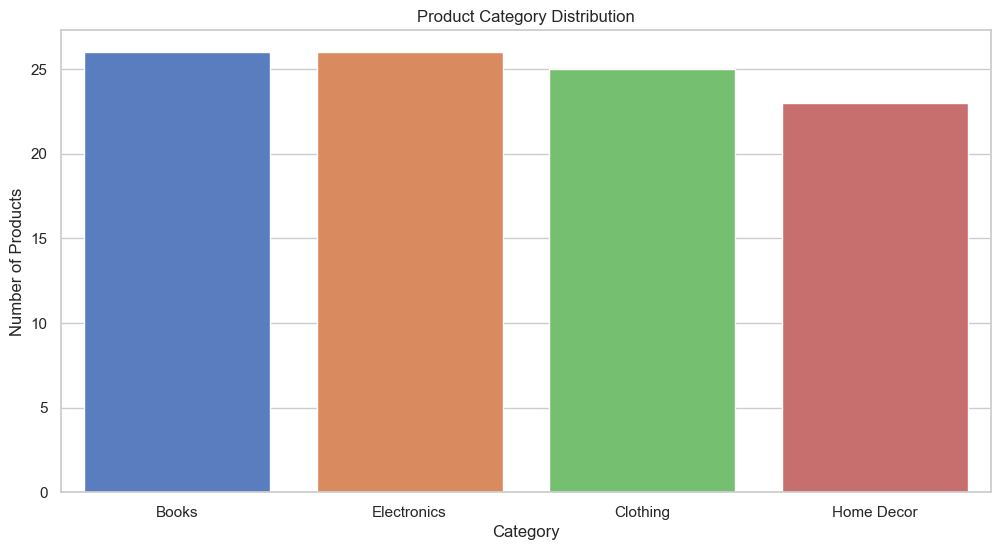

In [28]:
sns.barplot(x=product_category_count.index, y=product_category_count.values, palette='muted')
plt.title("Product Category Distribution")
plt.xlabel("Category")
plt.ylabel("Number of Products")
plt.show()

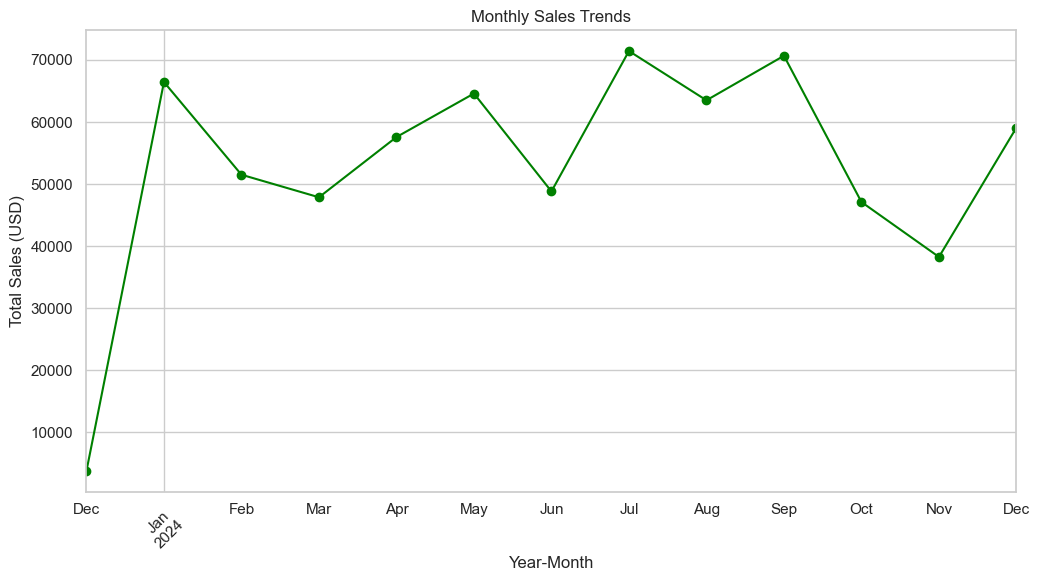

In [29]:
monthly_sales.plot(kind='line', marker='o', color='green')
plt.title("Monthly Sales Trends")
plt.xlabel("Year-Month")
plt.ylabel("Total Sales (USD)")
plt.xticks(rotation=45)
plt.show()

/var/folders/8r/ny9l6hrx2bl3fdnrypzcw9m80000gn/T/ipykernel_50709/1328326006.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_customers.index, y=top_customers.values, palette='coolwarm')


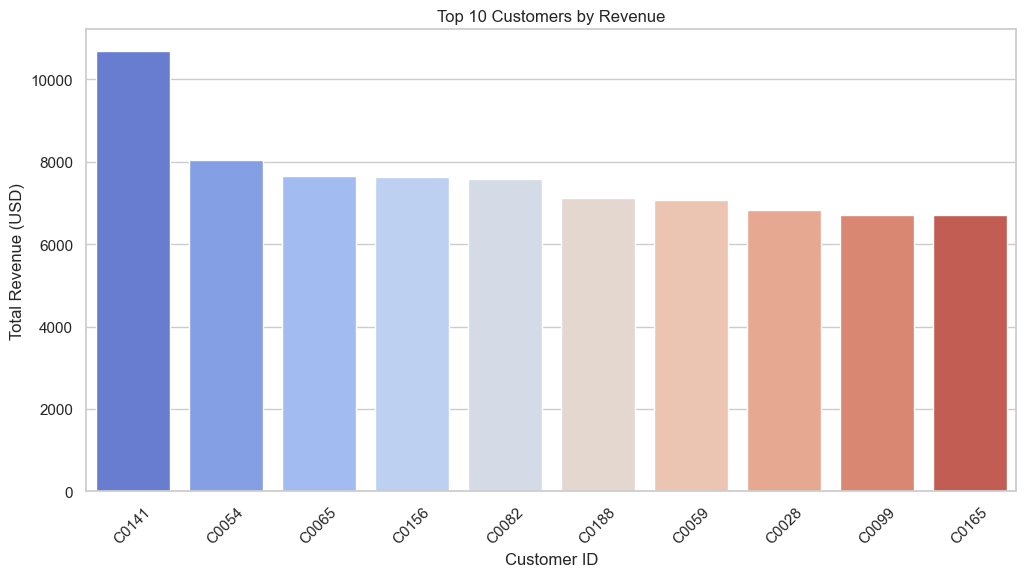

In [30]:
sns.barplot(x=top_customers.index, y=top_customers.values, palette='coolwarm')
plt.title("Top 10 Customers by Revenue")
plt.xlabel("Customer ID")
plt.ylabel("Total Revenue (USD)")
plt.xticks(rotation=45)
plt.show()

/var/folders/8r/ny9l6hrx2bl3fdnrypzcw9m80000gn/T/ipykernel_50709/3072303444.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_products.index, y=top_products.values, palette='plasma')


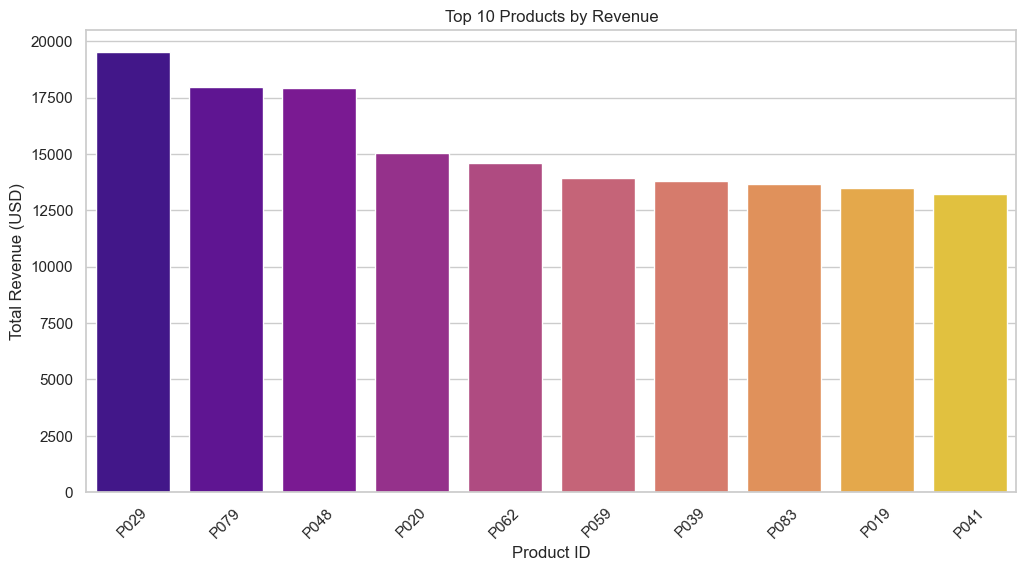

In [31]:
sns.barplot(x=top_products.index, y=top_products.values, palette='plasma')
plt.title("Top 10 Products by Revenue")
plt.xlabel("Product ID")
plt.ylabel("Total Revenue (USD)")
plt.xticks(rotation=45)
plt.show()

In [2]:
print("\nBusiness Insights:")
insights = [
    "1. The majority of customers come from specific regions, showing potential market hotspots. This suggests that the business can focus more resources in those geographic locations to increase customer engagement and sales. Analyzing demographic data and tailoring regional marketing campaigns can help tap into untapped potential within these areas. Additionally, understanding cultural preferences and local buying behavior can allow for the creation of region-specific products or promotions. By optimizing distribution channels in high-demand regions, businesses can improve operational efficiency and reduce logistical costs while increasing customer satisfaction.",
    
    "2. Signup trends indicate seasonal spikes, suggesting marketing campaigns should focus on those periods. Data analysis reveals that customers are more likely to sign up during specific times of the year, potentially during holidays, sales events, or end-of-season promotions. This seasonal trend offers businesses a clear window to execute targeted campaigns, providing special offers, discounts, or exclusive deals during these high-traffic periods. Anticipating these spikes can help businesses adjust inventory, staffing, and online marketing strategies, ensuring they maximize customer acquisition during peak signup times and capitalize on the demand.",
    
    "3. Certain product categories dominate the inventory, pointing to key revenue drivers. Analyzing product sales reveals that a few product categories are responsible for generating the bulk of the revenue. This insight can be used to prioritize marketing, inventory management, and product development strategies. Businesses may choose to refine their offerings within these high-performing categories, introducing complementary products, limited-edition variations, or bundling options to further drive sales. In addition, focusing on customer feedback and trends in these categories can help businesses forecast future demand, optimize pricing strategies, and identify potential gaps in the market.",
    
    "4. Monthly sales trends reveal peak sales months, highlighting possible seasonality in purchasing behavior. A closer look at monthly sales data indicates that sales fluctuate throughout the year, with certain months consistently outperforming others. This could be due to a variety of factors, such as holidays, weather conditions, or cultural events that drive consumer behavior. By identifying these peak periods, businesses can plan product launches, promotions, and marketing campaigns around these high-demand months. Additionally, understanding the low-sales months can help businesses streamline operations during off-peak times, reduce unnecessary costs, and improve inventory forecasting to prevent overstocking or stockouts.",
    
    "5. The top 10 customers contribute significantly to total revenue, emphasizing the importance of key account management. Customer data analysis shows that a small group of customers accounts for a large percentage of overall revenue. This insight underscores the importance of maintaining strong relationships with these high-value customers. Personalized marketing, exclusive offers, and loyalty programs can help retain these key clients, preventing them from switching to competitors. Furthermore, it may be beneficial for businesses to identify similar characteristics within this group of top customers, such as industry, company size, or buying behavior, and target similar prospects with tailored outreach strategies. By focusing on retaining and expanding these key accounts, businesses can create a more stable revenue stream and increase customer lifetime value."
]

for insight in insights:
    print(insight)



Business Insights:
1. The majority of customers come from specific regions, showing potential market hotspots. This suggests that the business can focus more resources in those geographic locations to increase customer engagement and sales. Analyzing demographic data and tailoring regional marketing campaigns can help tap into untapped potential within these areas. Additionally, understanding cultural preferences and local buying behavior can allow for the creation of region-specific products or promotions. By optimizing distribution channels in high-demand regions, businesses can improve operational efficiency and reduce logistical costs while increasing customer satisfaction.
2. Signup trends indicate seasonal spikes, suggesting marketing campaigns should focus on those periods. Data analysis reveals that customers are more likely to sign up during specific times of the year, potentially during holidays, sales events, or end-of-season promotions. This seasonal trend offers businesse